In [1]:
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pylab
from mpl_toolkits.mplot3d.axes3d import Axes3D
def show_plot(Path):
    #Feature,Label=GetMainVariable(path)
    temp = ReadOff(Path)
    temp = temp[np.arange(start=0, stop=temp.shape[0], step=1), :]
    X = temp[:, 0]
    Y = temp[:, 1]
    Z = temp[:, 2]
    fig = pylab.figure()
    ax = Axes3D(fig)

    ax.plot(X, Y, Z, label='helix')
    pylab.legend()
    pylab.title(Path)
    pylab.show()
    return

In [4]:
import os
import numpy as np
from scipy.special import sph_harm
from sklearn.decomposition import PCA

def ReadOff(Path):
    File = open(Path, 'rb')
    AllData = File.readlines()
    Data = np.zeros((AllData.__len__(), 3))
    for loop in range(2, AllData.__len__()):
        String = AllData[loop]
        ListString = String.split()
        if ListString.__len__() > 3:
            global FinaLength
            FinaLength = loop
            break
        String0 = float(ListString[0])
        String1 = float(ListString[1])
        String2 = float(ListString[2])
        Data[loop - 2, 0] = String0
        Data[loop - 2, 1] = String1
        Data[loop - 2, 2] = String2
    Data = np.delete(Data, np.s_[FinaLength - 2:], 0)

    return Data


def PathInfo():
    ParentPath = 'ModelNet2'

def GetSRow(Path):
    temp_raw = ReadOff(Path)
    temp = temp_raw[np.arange(start=0, stop=temp_raw.shape[0], step=int(temp_raw.shape[0]/512)), :]
    temp = temp[:512,]
    #print(temp.shape)
    theta = np.arccos(temp[:, 2] / np.sqrt(np.square(temp[:, 0]) + np.square(temp[:, 1]) + np.square(temp[:, 2])))
    phi = np.asarray_chkfinite(temp[:, 1] / np.sqrt(np.square(temp[:, 0]) + np.square(temp[:, 1])))
    del temp
    theta, phi = np.meshgrid(theta, phi)
    s = sph_harm(3, 3, theta, phi).real
    return s


def GetMainVariable(path):
    s = GetSRow(path)
    clf = PCA(n_components=3)
    clf.fit(s)
    Feature = clf.components_.reshape(1,3,512)
    #Feature = np.resize(Feature, (3, 1000))
    Label = path.split('/')[1]
    #LabelName = os.listdir('ModelNet40')
    #matches = next((loop for loop in range(Label.__len__()) if Label == LabelName[loop]))
    return Feature , Label


def GetTrainData():
    count = 0 
    Feature, Label = GetMainVariable('ModelNet2/glass_box/train/glass_box_0002.off')
    deleted_path = []
    for Folder in os.listdir('ModelNet2'):
        if (Folder == '.DS_Store'):
            continue
        for SubFile in os.listdir('ModelNet2/' + Folder + '/train'):
            SubPath = 'ModelNet2/' + Folder + '/train/' + SubFile
            if (ReadOff(SubPath).shape[0]<512):
                count+=1
                deleted_path.append(SubPath)
            else:
                try:
                    _Feature, _Label = GetMainVariable(SubPath)
                    Feature = np.vstack((Feature, _Feature))
                    Label = np.hstack((Label, _Label))
                except:
                    continue
    print('missed Value:', count)
    print('deleted path:', deleted_path)
    return Feature, Label


def GetTestData():
    count = 0
    Feature, Label = GetMainVariable('ModelNet2/mantel/test/mantel_0286.off')
    deleted_path = []
    for Folder in os.listdir('ModelNet2'):
        if (Folder == '.DS_Store'):
            continue
        for SubFile in os.listdir('ModelNet2/' + Folder + '/test'):
            SubPath = 'ModelNet2/' + Folder + '/test/' + SubFile
            if (ReadOff(SubPath).shape[0]<512):
                count+=1
                deleted_path.append(SubPath)
            else:
                try:
                    _Feature, _Label = GetMainVariable(SubPath)
                    Feature = np.vstack((Feature, _Feature))
                    Label = np.hstack((Label, _Label))
                except:
                    continue
    print('missed Value:', count)
    print('deleted path:', deleted_path)
    return Feature, Label

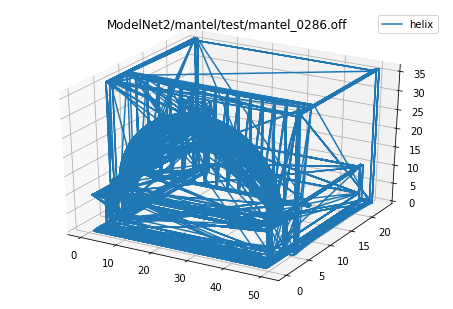

In [5]:
#原始图片
show_plot('ModelNet2/mantel/test/mantel_0286.off')

In [6]:
#原始矩阵读取顶点
ReadOff('ModelNet2/mantel/test/mantel_0286.off')

array([[50.25   ,  5.5    ,  0.75   ],
       [48.     ,  5.5    ,  0.     ],
       [50.25   ,  5.5    ,  0.     ],
       ...,
       [37.9555 ,  4.10615, 26.775  ],
       [38.3414 ,  4.1875 , 26.4579 ],
       [37.9444 ,  4.1875 , 26.7601 ]])

In [7]:
#球面调和之后矩阵的样子
GetSRow('ModelNet2/mantel/test/mantel_0286.off')

array([[2.37686639e-05, 2.92060579e-04, 3.12570196e-04, ...,
        5.11382451e-04, 5.28873611e-04, 5.00891743e-04],
       [1.47411060e-05, 1.81133275e-04, 1.93853151e-04, ...,
        3.17154676e-04, 3.28002532e-04, 3.10648436e-04],
       [1.99539844e-06, 2.45187203e-05, 2.62405192e-05, ...,
        4.29309677e-05, 4.43993647e-05, 4.20502644e-05],
       ...,
       [2.42808001e-05, 2.98353519e-04, 3.19305050e-04, ...,
        5.22401052e-04, 5.40269089e-04, 5.11684304e-04],
       [2.07851135e-05, 2.55399811e-04, 2.73334968e-04, ...,
        4.47191408e-04, 4.62486998e-04, 4.38017541e-04],
       [2.53170535e-05, 3.11086618e-04, 3.32932317e-04, ...,
        5.44696028e-04, 5.63326635e-04, 5.33521912e-04]])

In [8]:
#球面调和之后的矩阵的大小
GetSRow('ModelNet2/mantel/test/mantel_0286.off').shape

(512, 512)

In [9]:
#PCA之后的矩阵样子
GetMainVariable('ModelNet2/mantel/test/mantel_0286.off')

(array([[[ 0.00280658,  0.03448622,  0.03690797, ...,  0.06038352,
           0.06244886,  0.05914479],
         [ 0.00071517, -0.01515342, -0.00587743, ..., -0.04698102,
          -0.08151127,  0.07664962],
         [-0.00041726, -0.04697106,  0.05532944, ...,  0.04323191,
          -0.01587818, -0.06438634]]]), 'mantel')

In [10]:
GetMainVariable('ModelNet2/mantel/test/mantel_0286.off')[0].shape

(1, 3, 512)

In [11]:
a, b = GetTrainData()

missed Value: 2
deleted path: ['ModelNet2/mantel/train/.DS_Store', 'ModelNet2/glass_box/train/.DS_Store']


In [12]:
c,d = GetTestData()

missed Value: 2
deleted path: ['ModelNet2/mantel/test/.DS_Store', 'ModelNet2/glass_box/test/.DS_Store']


In [13]:
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)

(344, 3, 512)
(344,)
(152, 3, 512)
(152,)


In [16]:
a

array([[[ 3.21850752e-03,  9.53298395e-03,  7.16337533e-02, ...,
          6.66493914e-02,  6.61982293e-02,  6.58482141e-02],
        [-3.71057267e-03, -1.32952894e-02, -8.94885751e-02, ...,
          7.14902525e-02, -1.75385741e-02,  1.01154451e-01],
        [ 2.91157056e-03, -9.50818252e-04,  3.72576358e-02, ...,
          2.99962972e-02, -5.93991580e-02, -1.13021160e-01]],

       [[ 4.59592973e-02,  5.50288309e-02,  4.55943691e-02, ...,
          5.77312815e-02,  5.80487036e-02,  5.88497205e-02],
        [ 2.87078358e-03,  1.19775782e-01,  2.62130662e-02, ...,
         -3.43032393e-02,  5.71788507e-02,  4.76110730e-02],
        [ 5.18527994e-02,  7.22600507e-02, -4.64369340e-02, ...,
         -2.82422386e-02,  4.19088895e-02,  6.50116087e-02]],

       [[ 2.57173989e-03,  3.20667861e-02,  4.56093403e-02, ...,
          6.36466566e-02,  6.39880000e-02,  6.38238956e-02],
        [ 1.59390560e-03, -1.24040404e-02,  5.12020305e-03, ...,
         -2.22755123e-02,  1.91985102e-02,  6.712

In [17]:
b

array(['glass_box', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'mantel',
       'mantel', 'mantel', 'mantel', 'mantel', 'mantel', 'm

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(b)

LabelEncoder()

In [15]:
le.classes_

array(['glass_box', 'mantel'], dtype='<U9')

In [16]:
train_label = le.transform(b)
test_label = le.transform(d)

In [17]:
train_label

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
x_train = a
x_test = c
y_train = train_label
y_test = test_label

In [19]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.10.1


In [20]:
#测试全连接网络
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(3, 512)),
    keras.layers.Dense(256),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
344/344 [==============================] - 0s 1ms/step - loss: 0.5812 - acc: 0.6860
Epoch 2/20
344/344 [==============================] - 0s 182us/step - loss: 0.2649 - acc: 0.9419
Epoch 3/20
344/344 [==============================] - 0s 236us/step - loss: 0.0950 - acc: 0.9709
Epoch 4/20
344/344 [==============================] - 0s 282us/step - loss: 0.0435 - acc: 0.9913
Epoch 5/20
344/344 [==============================] - 0s 152us/step - loss: 0.0162 - acc: 1.0000
Epoch 6/20
344/344 [==============================] - 0s 287us/step - loss: 0.0063 - acc: 1.0000
Epoch 7/20
344/344 [==============================] - 0s 209us/step - loss: 0.0037 - acc: 1.0000
Epoch 8/20
344/344 [==============================] - 0s 221us/step - loss: 0.0023 - acc: 1.0000
Epoch 9/20
344/344 [==============================] - 0s 184us/step - loss: 0.0014 - acc: 1.0000
Epoch 10/20
344/344 [==============================] - 0s 169us/step - loss: 9.9967e-04 - acc: 1.0000
Epoch 11/20
344/344 [======

In [21]:
from sklearn.metrics import classification_report

In [22]:
fully_connected_pred = model.predict_classes(x_test)
report_fc = classification_report(y_test, fully_connected_pred)
print(report_fc)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        81
           1       0.91      0.97      0.94        71

   micro avg       0.94      0.94      0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152



In [87]:
# #测试CNN
# from __future__ import print_function
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, Conv1D
# from keras.callbacks import ModelCheckpoint
# from keras.models import model_from_json
# from keras import backend as K

# model = Sequential()
# model.add(Conv1D(256,(1), input_shape=(3,512), activation='relu', padding="same"))
# model.add(Conv1D(128,(1), activation='relu', padding="same"))
# model.add(Conv1D(64,(1), activation='relu', padding="same"))
# model.add(Flatten())
# model.add(Dense(64, activation='softmax'))
# model.add(Dense(3, activation='softmax'))

# model.compile(optimizer = tf.train.AdamOptimizer(),
#               loss='sparse_categorical_crossentropy', #keras.losses.categorical_crossentropy,
#               metrics=['accuracy'])
# batch_size = 128
# epochs = 100
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1)

Epoch 1/100
344/344 [==============================] - 1s 2ms/step - loss: 1.0843 - acc: 0.6017
Epoch 2/100
344/344 [==============================] - 0s 85us/step - loss: 1.0773 - acc: 0.6017
Epoch 3/100
344/344 [==============================] - 0s 78us/step - loss: 1.0681 - acc: 0.6017
Epoch 4/100
344/344 [==============================] - 0s 79us/step - loss: 1.0552 - acc: 0.6017
Epoch 5/100
344/344 [==============================] - 0s 80us/step - loss: 1.0376 - acc: 0.6017
Epoch 6/100
344/344 [==============================] - 0s 80us/step - loss: 1.0155 - acc: 0.6017
Epoch 7/100
344/344 [==============================] - 0s 88us/step - loss: 0.9901 - acc: 0.6047
Epoch 8/100
344/344 [==============================] - 0s 84us/step - loss: 0.9600 - acc: 0.6919
Epoch 9/100
344/344 [==============================] - 0s 83us/step - loss: 0.9312 - acc: 0.7442
Epoch 10/100
344/344 [==============================] - 0s 85us/step - loss: 0.9077 - acc: 0.7442
Epoch 11/100
344/344 [========

In [88]:
# cnn_pred = model.predict_classes(x_test)
# report_cnn = classification_report(y_test, cnn_pred)
# print(report_cnn)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        81
           1       0.95      0.97      0.96        71

   micro avg       0.96      0.96      0.96       152
   macro avg       0.96      0.96      0.96       152
weighted avg       0.96      0.96      0.96       152



In [90]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv1D, MaxPooling1D
# model = Sequential()
# model.add(Conv1D(256, (2), padding='same',
#                  input_shape=(3,512)))
# model.add(Activation('relu'))
# model.add(Conv1D(256, (2)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.25))

# model.add(Conv1D(128, (1), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv1D(128, (1)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(2))
# model.add(Activation('softmax'))
# model.compile(optimizer = tf.train.AdamOptimizer(),
#               loss='sparse_categorical_crossentropy', #keras.losses.categorical_crossentropy,
#               metrics=['accuracy'])
# batch_size = 128
# epochs = 30
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1)

Epoch 1/30
344/344 [==============================] - 1s 3ms/step - loss: 3.6874 - acc: 0.0669
Epoch 2/30
344/344 [==============================] - 0s 180us/step - loss: 3.5838 - acc: 0.3837
Epoch 3/30
344/344 [==============================] - 0s 165us/step - loss: 3.3307 - acc: 0.4826
Epoch 4/30
344/344 [==============================] - 0s 163us/step - loss: 2.7671 - acc: 0.5029
Epoch 5/30
344/344 [==============================] - 0s 161us/step - loss: 1.9347 - acc: 0.5116
Epoch 6/30
344/344 [==============================] - 0s 161us/step - loss: 1.5255 - acc: 0.5669
Epoch 7/30
344/344 [==============================] - 0s 162us/step - loss: 1.3117 - acc: 0.5523
Epoch 8/30
344/344 [==============================] - 0s 163us/step - loss: 1.2643 - acc: 0.5233
Epoch 9/30
344/344 [==============================] - 0s 161us/step - loss: 1.0746 - acc: 0.5988
Epoch 10/30
344/344 [==============================] - 0s 162us/step - loss: 0.9787 - acc: 0.5581
Epoch 11/30
344/344 [==========

In [91]:
# cnn_pred_2 = model.predict_classes(x_test)
# report_cnn_2 = classification_report(y_test, cnn_pred_2)
# print(report_cnn_2)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        81
           1       0.88      0.99      0.93        71

   micro avg       0.93      0.93      0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152



In [114]:
# #flat for linear model
# x_train_flat = x_train.reshape(344,1536)
# x_test_flat = x_test.reshape(152,1536)

In [93]:
# #测试逻辑回归
# from sklearn.metrics import confusion_matrix
# import datetime
# from sklearn.linear_model import LogisticRegression
# starttime = datetime.datetime.now()
# #Logistic Regression Classifier
# clf = LogisticRegression(random_state=0, solver='lbfgs',
#                          multi_class='multinomial').fit(x_train_flat, y_train)
# pred_lr = clf.predict(x_test_flat)
# report_lr = classification_report(y_test,pred_lr)
# score_lr = clf.score(x_test_flat, y_test)
# lr_cm = confusion_matrix(y_test, pred_lr)
# print (report_lr)
# print (score_lr)
# endtime= datetime.datetime.now()
# print ((endtime - starttime).seconds)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91        81
           1       0.84      0.99      0.91        71

   micro avg       0.91      0.91      0.91       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.92      0.91      0.91       152

0.9078947368421053
0


In [94]:
# #测试XGBoost
# from xgboost import XGBClassifier
# #XGBoost
# print ('*************************\nXGBoost\n*************************')
# starttime = datetime.datetime.now()
# xgb = XGBClassifier(learning_rate =0.05, n_estimators=1000, max_depth=8,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
#     objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
# xgb.fit(x_train_flat,y_train)
# pred_xgb = xgb.predict(x_test_flat)
# report_xgb = classification_report(y_test, pred_xgb)
# xgb_cm = confusion_matrix(y_test, pred_xgb)
# print (report_xgb)
# endtime= datetime.datetime.now()
# print ((endtime - starttime).seconds)

*************************
XGBoost
*************************
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        81
           1       0.95      0.99      0.97        71

   micro avg       0.97      0.97      0.97       152
   macro avg       0.97      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152

7


In [23]:
def euclidDistance(vec1, vec2):
    dist = np.linalg.norm(vec1-vec2)
    return(dist)

def cosSimilarity(vec1, vec2):
    num=float(numpy.sum(vec1*vec2))
    denom=numpy.linalg.norm(vec1)*numpy.linalg.norm(vec2)
    cos=num/denom
    sim=0.5+0.5*cos
    return(sim)

In [24]:
euclidDistance(x_test[0], x_train[1])

2.1686855893121

In [25]:
def findClass4File(Path, clf):
    feature, label = GetMainVariable(Path)
    predict_label = clf.predict_classes(feature)
    return(feature, le.inverse_transform(predict_label))

In [26]:
findClass4File('ModelNet2/mantel/test/mantel_0286.off', model)

(array([[[ 0.00280658,  0.03448622,  0.03690797, ...,  0.06038352,
           0.06244886,  0.05914479],
         [ 0.00127473, -0.0140676 ,  0.00244427, ..., -0.06856528,
          -0.07876016,  0.06653704],
         [ 0.00305329,  0.07616652,  0.06134091, ..., -0.01096427,
          -0.07502274,  0.05965507]]]), array(['mantel'], dtype='<U9'))

In [27]:
def findSimilarFile(Path, clf):
    input_feature, pred_label = findClass4File(Path, clf)
    pred_label = pred_label[0]
    similarity_dic = {}
    for SubFile in os.listdir('ModelNet2/' + pred_label + '/train'):
        SubPath = 'ModelNet2/' + pred_label + '/train/' + SubFile
        try:
            _Feature, _Label = GetMainVariable(SubPath)
            similarity_dic[SubFile] = euclidDistance(input_feature, _Feature)
        except:
            continue
    return(similarity_dic)

In [28]:
%%time
sample_dict = findSimilarFile('ModelNet2/mantel/test/mantel_0286.off', model)

CPU times: user 56.7 s, sys: 3.56 s, total: 1min
Wall time: 24.3 s


In [29]:
sample_dict

{'mantel_0247.off': 2.1900217226457306,
 'mantel_0253.off': 2.2551994208477315,
 'mantel_0079.off': 2.1713899406586026,
 'mantel_0045.off': 2.2809514843465215,
 'mantel_0051.off': 2.187213755088543,
 'mantel_0119.off': 2.180781733075701,
 'mantel_0124.off': 2.1258382532004583,
 'mantel_0130.off': 2.1592402631913536,
 'mantel_0118.off': 2.2858069747842364,
 'mantel_0050.off': 2.0925890767241384,
 'mantel_0044.off': 2.2509301660897667,
 'mantel_0078.off': 2.1326830531663026,
 'mantel_0246.off': 2.2113677158801166,
 'mantel_0278.off': 2.2469641501844926,
 'mantel_0250.off': 2.2919642937207936,
 'mantel_0244.off': 2.203287936875561,
 'mantel_0085.off': 2.279143632668317,
 'mantel_0052.off': 2.1503104985589006,
 'mantel_0046.off': 2.241376269194046,
 'mantel_0047.off': 2.298646827019484,
 'mantel_0053.off': 2.1898301895410404,
 'mantel_0084.off': 2.1982777019463757,
 'mantel_0279.off': 2.335545898198403,
 'mantel_0282.off': 2.754510356234304,
 'mantel_0255.off': 2.1355467161134656,
 'mantel

In [30]:
def findMostSimilarFile(Path, clf):
    sample_dict = findSimilarFile(Path, clf)
    sorted_x = sorted(sample_dict.items(), key=lambda kv: kv[1])
    return(sorted_x[:5])

In [31]:
similar_result = findMostSimilarFile('ModelNet2/mantel/test/mantel_0286.off', model)

In [32]:
similar_result 

[('mantel_0077.off', 2.107142831347957),
 ('mantel_0196.off', 2.1093756605200067),
 ('mantel_0103.off', 2.1117600763966697),
 ('mantel_0050.off', 2.1145102840804695),
 ('mantel_0142.off', 2.1184240763148874)]

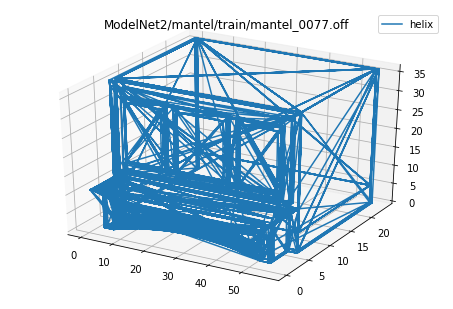

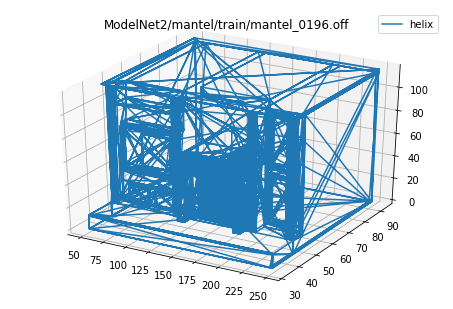

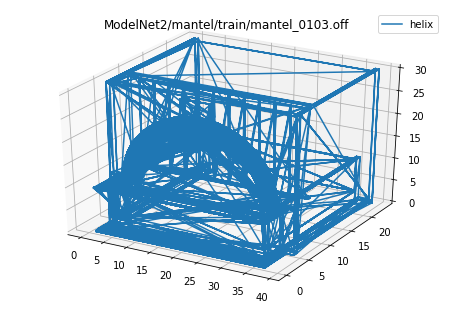

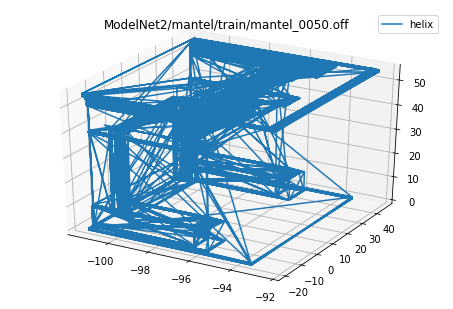

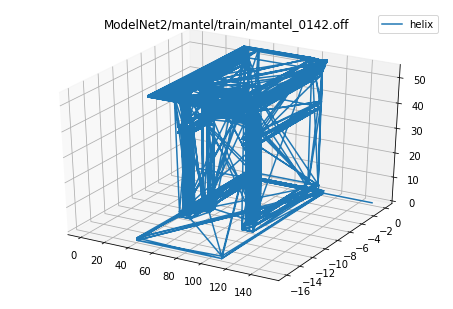

In [33]:
for i in similar_result:
    predLabel = i[0].split('_')[0]
    similarPath = 'ModelNet2/' + predLabel + '/train/' +i[0]
    show_plot(similarPath)

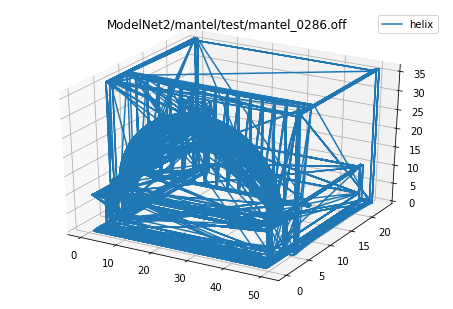

In [40]:
#原始图像
show_plot('ModelNet2/mantel/test/mantel_0286.off')